In [1]:
import json
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def writeEvalsToFile():
    files = glob.glob(os.path.join(EVAL_PATH, '*.json'), recursive=True)
    complete_results = []
    
    for path in files:
        print(path) 
        results_file = open(os.path.join(RESULTS_PATH, f"{path.split('/')[-1]}"), 'w')
        results = {}
        check_file = os.path.getsize(path)

        if check_file == 0:
            continue
                
        with open(path, 'r') as file:
            
            evals = json.load(file)
            total_yes = 0
            total_no = 0
            unknown = 0
            
            for eval in evals:
                ground_truth = eval['ground_truth']
                answer_type = eval['answer_type']
                consistent = eval['consistent'].split('consistent:')[-1]
                is_correct = "unknown"
                
                if 'yes' in consistent.lower() or 'true' in consistent.lower():
                    is_correct = "correct"
                    total_yes += 1
                elif 'no' in consistent.lower() or 'false' in consistent.lower():
                    is_correct = "incorrect"
                    total_no += 1
                else:
                    unknown += 1
    
                key = f"{answer_type}"
                if key in results.keys():
                        results[key][is_correct] += 1
                        results[key]['total'] += 1
                else:
                    results[key] = {'correct': 0, 'incorrect': 0, 'unknown': 0, 'total': 1}
                    results[key][is_correct] = 1
            
            results['yes'] = total_yes
            results['no'] = total_no
            results['unknown'] = unknown
            
            sorted_items = sorted(results.items(), key=lambda x: x[0])
            
            sorted_dict = dict(sorted_items)
    
            for key in ['yes-no', 'number', 'shape', 'size', 'relation', 'colour', 'material']:
                # print(key)
                if key in results.keys():
                    sorted_dict["accuracy_" + key] = results[key]['correct']/(results[key]['correct'] + results[key]['incorrect'])
            if total_yes + total_no > 0:
                sorted_dict["accuracy"] = results['yes']/(results['no']+results['yes'])
    

            json.dump(sorted_dict, results_file)
            results_file.close()
  
            if total_yes + total_no > 0:
                print(total_yes, total_no, unknown, total_yes/(total_yes+total_no))

In [12]:
def showEvalsPlotOver_(comparison, mllm):
    results = []
    
    if comparison == 'num':
        iterate = range(3,11)
    elif comparison == 'type':
        iterate = ['inter', 'intra']
    else:
        return
    
    for i in iterate:

        with open(f"{RESULTS_PATH}/val_{comparison}_{i}.json", 'r') as file:
            print(file)
            data = json.load(file)
            
            results.append(data)
    
    accuracy_colour = [obj['accuracy_colour'] for obj in results]
    accuracy_shape = [obj['accuracy_shape'] for obj in results]
    accuracy_yes = [obj['accuracy_yes-no'] for obj in results]
    accuracy_number = [obj['accuracy_number'] for obj in results]
    accuracy = [obj['accuracy'] for obj in results]
    
    # Create x values (assuming one data point per object)
    x = iterate
    
    # Create line plots
    plt.figure(figsize=(8, 6))
    plt.plot(x, accuracy_shape, marker='o', label='accuracy_shape')
    plt.plot(x, accuracy_colour, marker='o', label='accuracy_colour')
    plt.plot(x, accuracy_yes, marker='o', label='accuracy_yes')
    plt.plot(x, accuracy_number, marker='o', label='accuracy_number')
    plt.plot(x, accuracy, marker='o', label='accuracy')
    
    plt.xlabel('Object')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Variation over Objects ({mllm})')
    
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(f'{RESULTS_PATH}/plot_{comparison}.pdf')
    plt.show()

/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_type_inter.json
37260 33426 12 0.5271199388846448
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_num_9.json
4825 4198 1 0.5347445417266984
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_type_intra.json
875 650 0 0.5737704918032787
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_num_3.json
4859 4322 1 0.5292451802635878
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_num_7.json
4594 4087 0 0.5292017048727106
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_num_10.json
4695 4234 1 0.5258147608914772
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/val_num_5.json
4682 4179 0 0.5283828010382575
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaVA/va

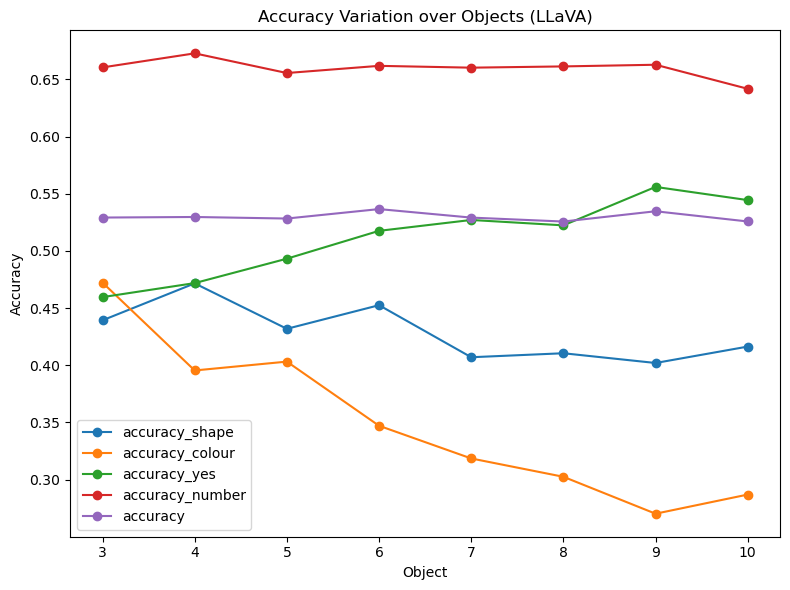

<_io.TextIOWrapper name='/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/LLaVA/val_type_inter.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/LLaVA/val_type_intra.json' mode='r' encoding='UTF-8'>


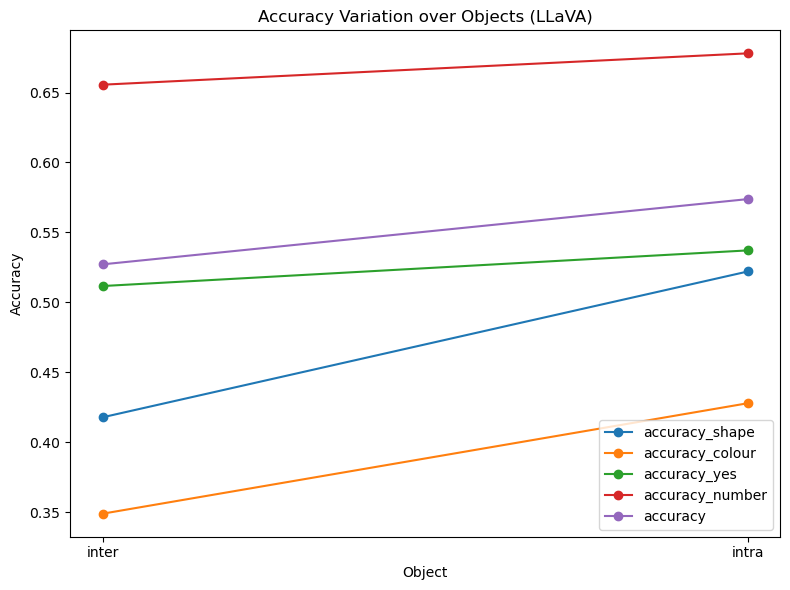

In [13]:
MLLM = 'LLaVA'

EVAL_PATH = f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/{MLLM}'  
RESULTS_PATH = f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/{MLLM}'

writeEvalsToFile()

showEvalsPlotOver_('num', MLLM)
showEvalsPlotOver_('type', MLLM)

/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_type_inter.json
35802 34883 13 0.5065006719954729
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_num_3.json
4587 4592 3 0.49972763917638086
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_num_9.json
4610 4410 4 0.5110864745011087
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_num_10.json
4494 4432 4 0.5034730002240645
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_num_7.json
4377 4304 0 0.5042045847252621
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_num_8.json
4720 4618 2 0.5054615549368173
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_num_6.json
4599 4337 2 0.5146598030438675
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/LLaMA/val_

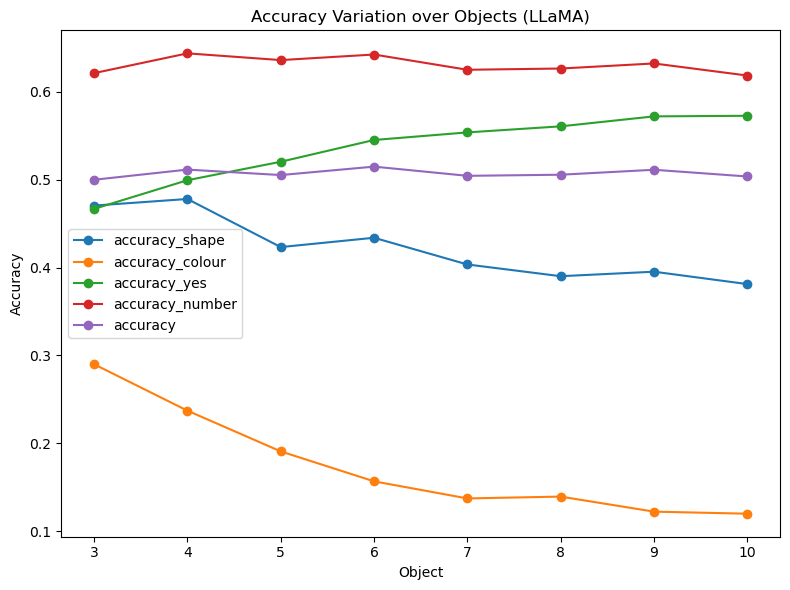

<_io.TextIOWrapper name='/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/LLaMA/val_type_inter.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/LLaMA/val_type_intra.json' mode='r' encoding='UTF-8'>


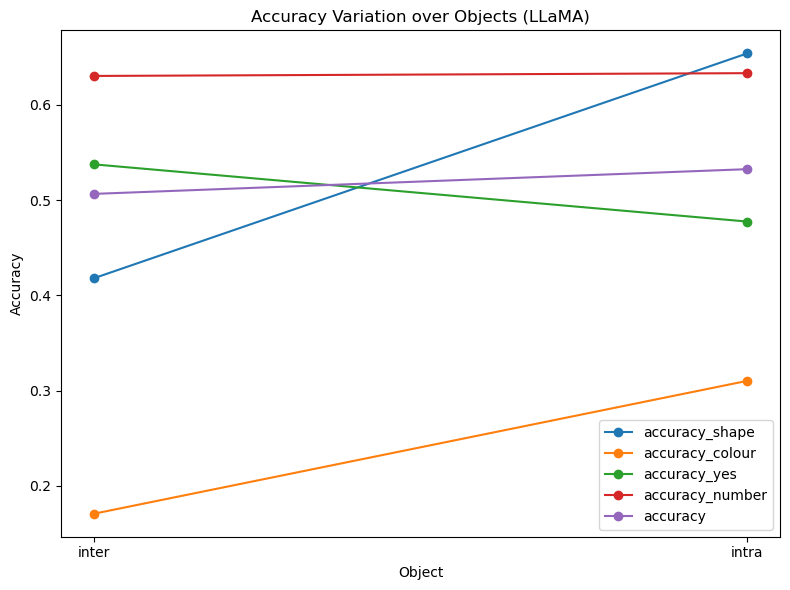

In [14]:
MLLM = 'LLaMA'

EVAL_PATH = f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/{MLLM}'  
RESULTS_PATH = f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/{MLLM}'

writeEvalsToFile()

showEvalsPlotOver_('num', MLLM)
showEvalsPlotOver_('type', MLLM)

/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_num_10.json
3618 5309 3 0.40528733057018035
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_type_inter.json
30921 39754 23 0.4375097276264591
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_num_6.json
3927 5010 1 0.4394091977173548
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_num_7.json
3737 4941 3 0.43062917722977645
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_num_5.json
3947 4912 2 0.44553561350039506
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_num_9.json
3699 5319 6 0.4101796407185629
/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/InstructBLIP/val_num_4.json
4306 4958 3 0.46481001727115717
/scratch/averma90/MLLM_Hallucinatio

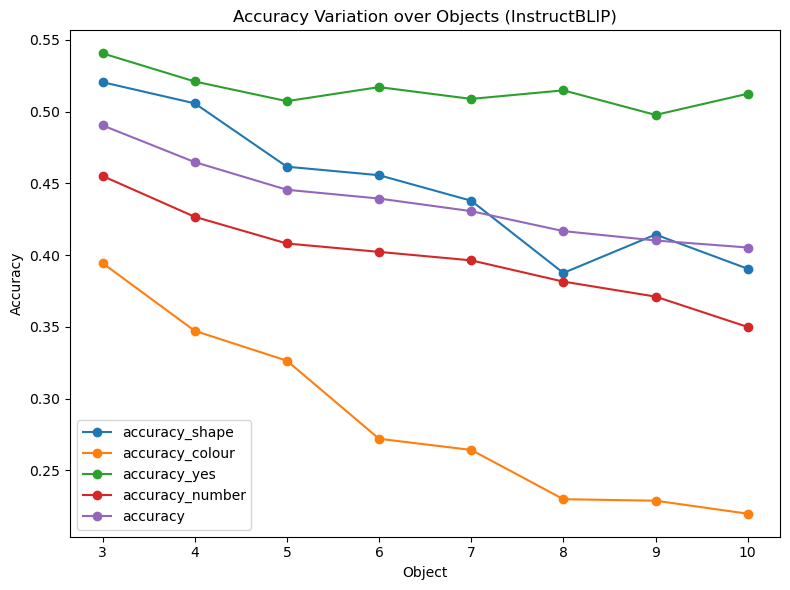

<_io.TextIOWrapper name='/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/InstructBLIP/val_type_inter.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/InstructBLIP/val_type_intra.json' mode='r' encoding='UTF-8'>


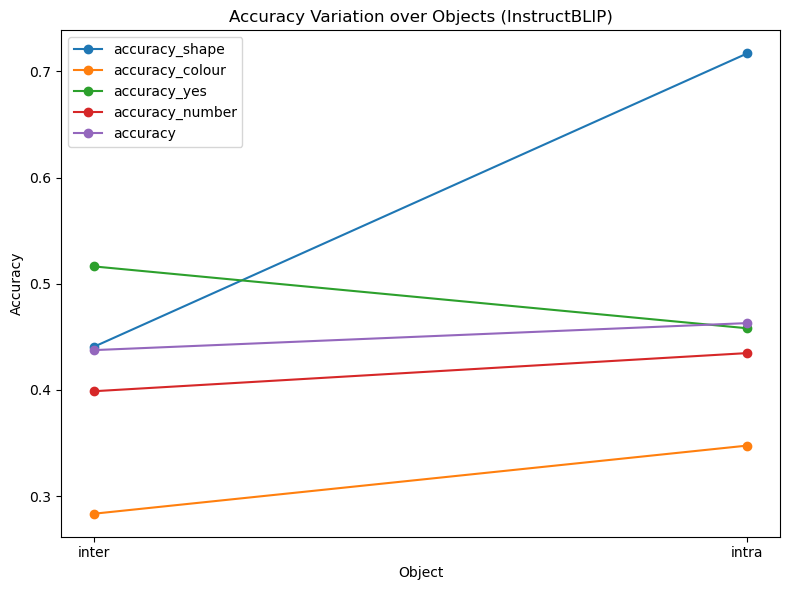

In [15]:
MLLM = 'InstructBLIP'

EVAL_PATH = f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Results/{MLLM}'  
RESULTS_PATH = f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/baselines/Zephyr_Analysis/{MLLM}'

writeEvalsToFile()

showEvalsPlotOver_('num', MLLM)
showEvalsPlotOver_('type', MLLM)